In [1]:
import tensorflow as tf

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from  shutil import copyfile
import random
import zipfile

In [9]:
BASE_PATH = 'C:\\Users\\sashe\\OneDrive\\Desktop\\neural networks\\cat_vs_dog'
TRAIN_PATH='C:\\Users\\sashe\\OneDrive\\Desktop\\neural networks\\cat_vs_dog\\training_set'
VAL_PATH='C:\\Users\\sashe\\OneDrive\\Desktop\\neural networks\\cat_vs_dog\\test_set'

In [3]:
batch_size = 64 #128
epochs = 75
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [6]:
train_image_generator = ImageDataGenerator(
                                                rescale=1./255,
                                                rotation_range=45,
                                                width_shift_range=.15,
                                                height_shift_range=.15,
                                                horizontal_flip=True,
                                                zoom_range=0.3                         

                                            ) # Generator for our training data

In [7]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAIN_PATH,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=VAL_PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

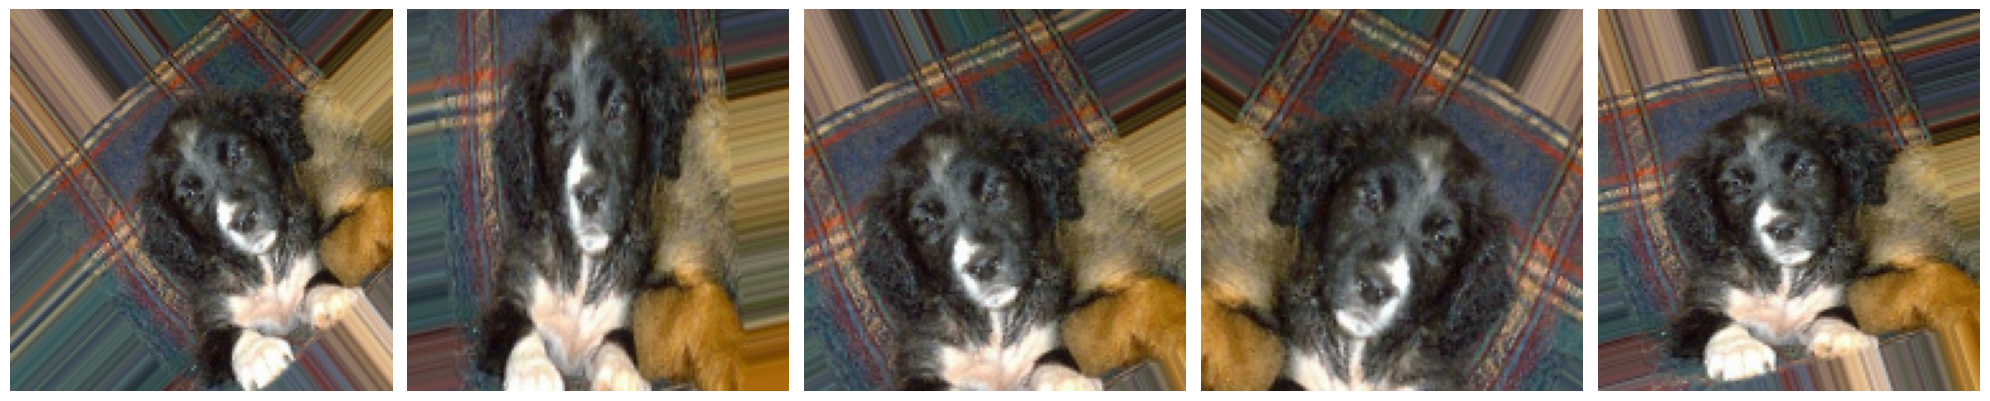

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
sample_training_images, _ = next(train_data_gen)

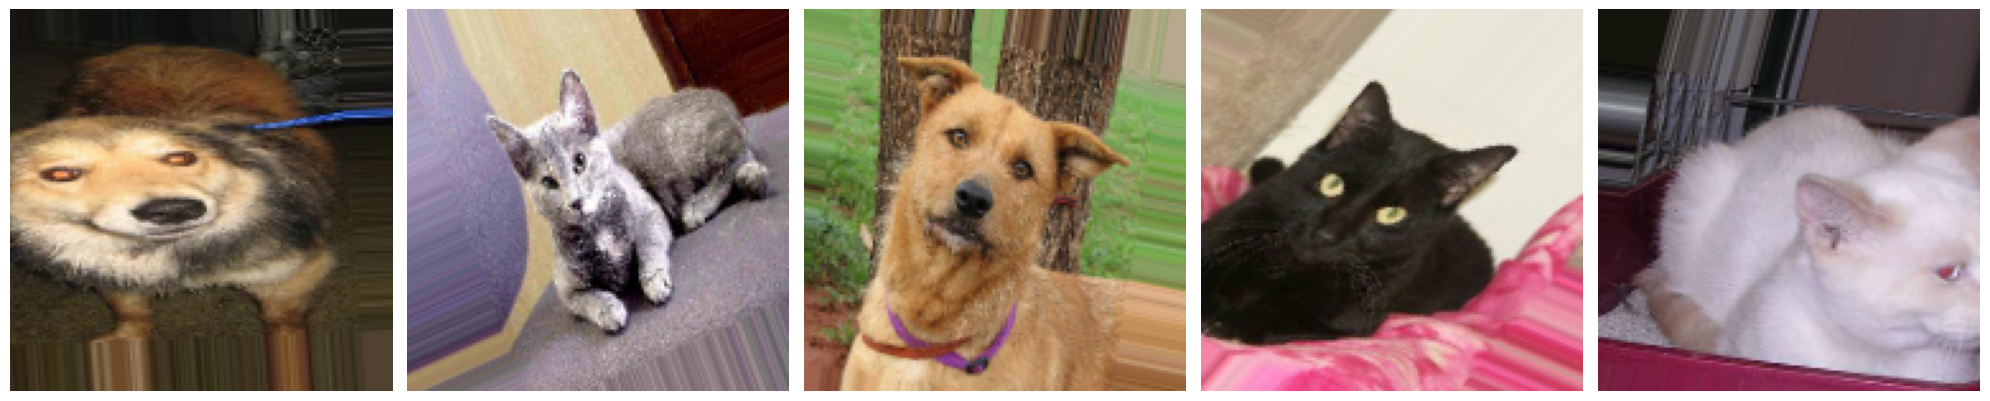

In [14]:
plotImages(sample_training_images[:5])

In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [20]:

# batch_size=100
# history = model.fit_generator(
#     train_data_gen,
#     steps_per_epoch=1000,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=1000
# )

batch_size=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=100,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=25
)

C:\Users\sashe\AppData\Local\Temp\ipykernel_31460\384028482.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/75
100/100 [==============================] - 108s 1s/step - loss: 0.6040 - accuracy: 0.6466 - val_loss: 0.5583 - val_accuracy: 0.7113
Epoch 2/75
100/100 [==============================] - 102s 1s/step - loss: 0.5871 - accuracy: 0.6636 - val_loss: 0.5383 - val_accuracy: 0.6800
Epoch 3/75
100/100 [==============================] - 100s 999ms/step - loss: 0.5700 - accuracy: 0.6795 - val_loss: 0.5560 - val_accuracy: 0.7275
Epoch 4/75
100/100 [==============================] - 100s 995ms/step - loss: 0.5587 - accuracy: 0.6886 - val_loss: 0.5058 - val_accuracy: 0.7412
Epoch 5/75
100/100 [==============================] - 98s 979ms/step - loss: 0.5484 - accuracy: 0.6964 - val_loss: 0.5069 - val_accuracy: 0.7306
Epoch 6/75
100/100 [==============================] - 102s 1s/step - loss: 0.5509 - accuracy: 0.6955 - val_loss: 0.4830 - val_accuracy: 0.7625
Epoch 7/75
100/100 [==============================] - 100s 998ms/step - loss: 0.5455 - accuracy: 0.7072 - val_loss: 0.4820 - val_accur

100/100 [==============================] - 100s 1s/step - loss: 0.3643 - accuracy: 0.8236 - val_loss: 0.3431 - val_accuracy: 0.8413
Epoch 58/75
100/100 [==============================] - 103s 1s/step - loss: 0.3554 - accuracy: 0.8273 - val_loss: 0.3700 - val_accuracy: 0.8675
Epoch 59/75
100/100 [==============================] - 101s 1s/step - loss: 0.3704 - accuracy: 0.8233 - val_loss: 0.3377 - val_accuracy: 0.8519
Epoch 60/75
100/100 [==============================] - 100s 1s/step - loss: 0.3576 - accuracy: 0.8270 - val_loss: 0.3274 - val_accuracy: 0.8694
Epoch 61/75
100/100 [==============================] - 100s 1s/step - loss: 0.3597 - accuracy: 0.8306 - val_loss: 0.3352 - val_accuracy: 0.8512
Epoch 62/75
100/100 [==============================] - 103s 1s/step - loss: 0.3514 - accuracy: 0.8339 - val_loss: 0.3169 - val_accuracy: 0.8612
Epoch 63/75
100/100 [==============================] - 105s 1s/step - loss: 0.3482 - accuracy: 0.8370 - val_loss: 0.3266 - val_accuracy: 0.8744
Epoc

In [21]:
model.save('..\\cat_and_dog_classifier')

INFO:tensorflow:Assets written to: cat_and_dog_classifier\assets


INFO:tensorflow:Assets written to: cat_and_dog_classifier\assets


In [22]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

In [50]:
img_path='C:\\Users\\sashe\\OneDrive\\Desktop\\neural networks\\cat_vs_dog\\test_set\\dogs\\dog.4051.jpg' #dog

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0
y_pred=model.predict(x)
_pred =(y_pred>0.5)
print(y_pred)
print(_pred)

1/1 [==============================] - 0s 29ms/step
[[9.975339]]
[[ True]]


In [25]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [31]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


conv2d (3, 3, 3, 16)
16


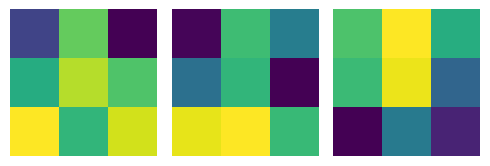

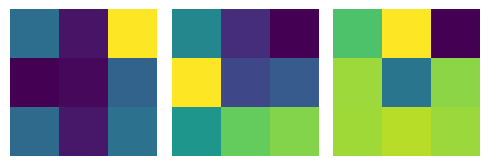

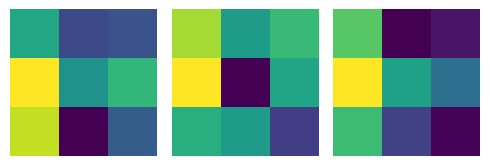

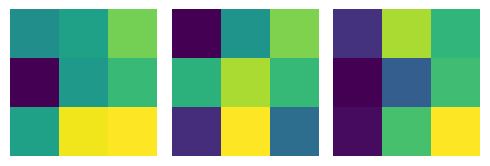

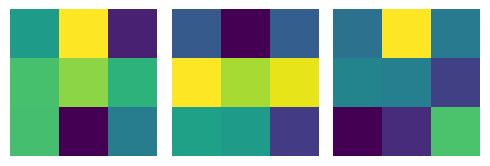

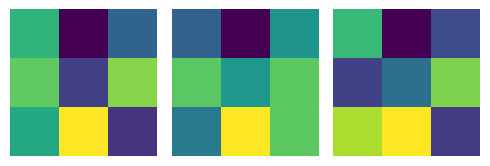

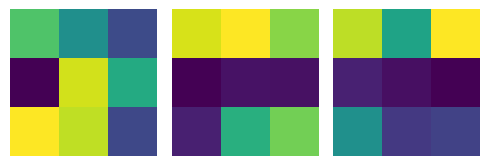

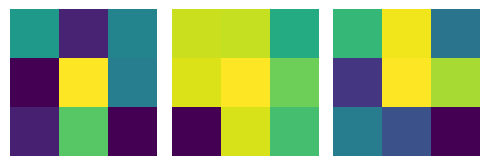

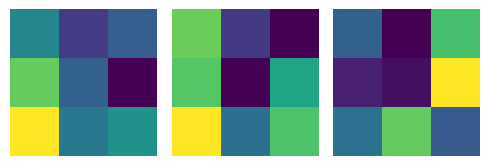

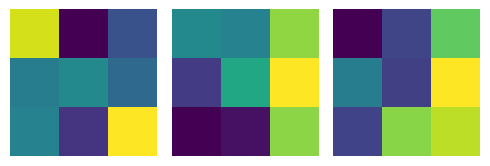

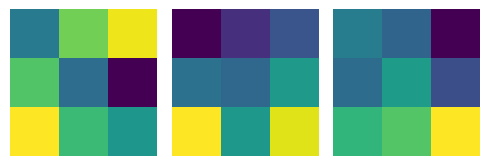

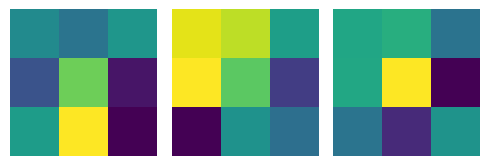

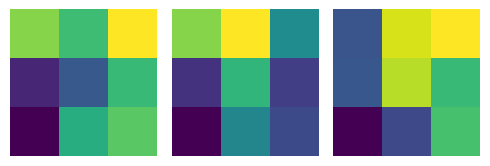

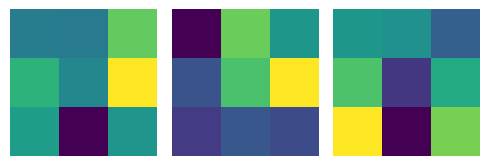

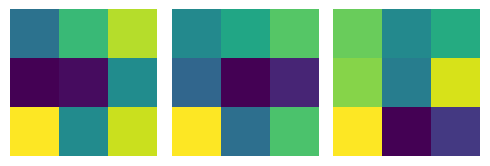

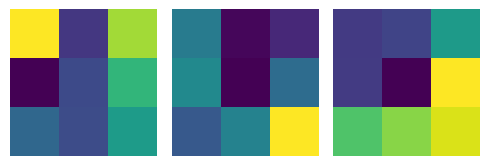

conv2d_1 (3, 3, 16, 32)
32


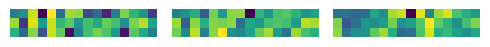

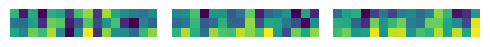

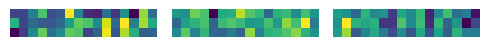

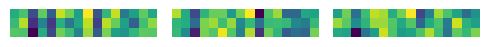

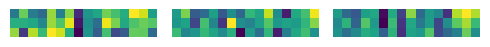

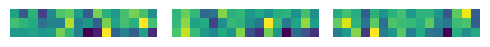

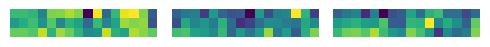

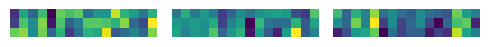

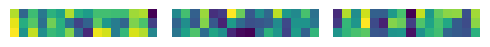

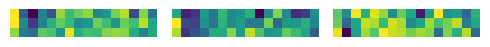

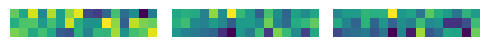

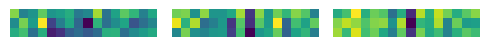

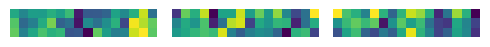

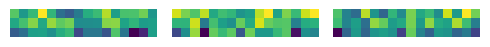

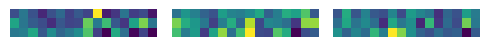

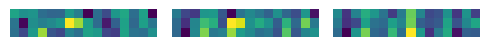

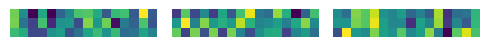

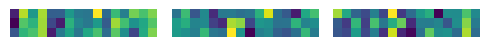

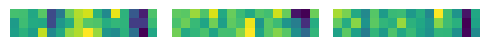

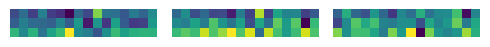

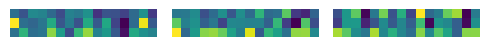

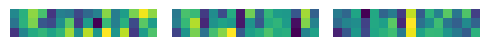

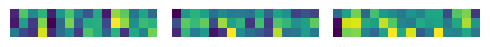

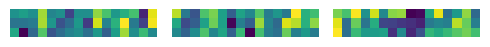

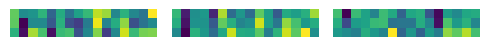

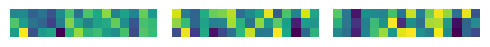

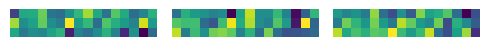

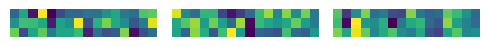

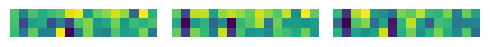

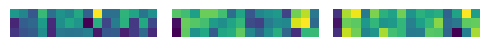

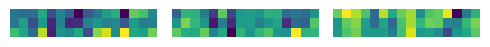

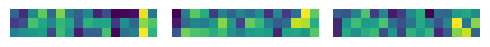

conv2d_2 (3, 3, 32, 64)
64


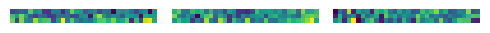

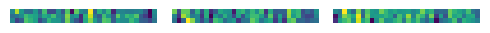

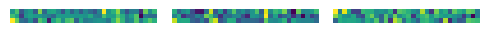

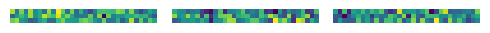

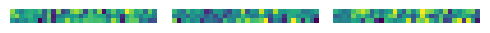

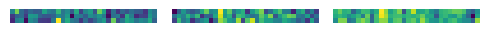

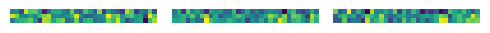

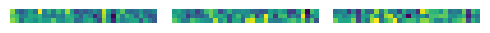

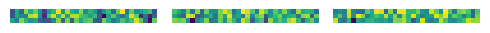

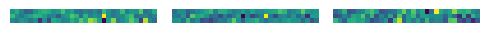

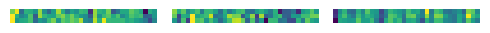

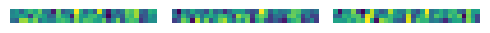

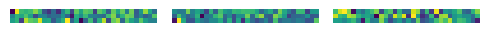

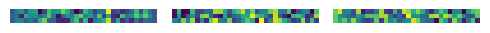

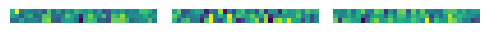

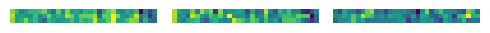

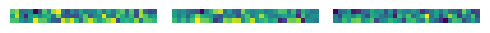

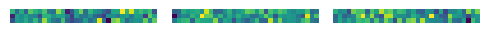

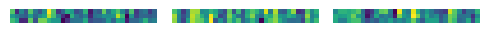

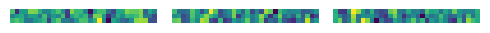

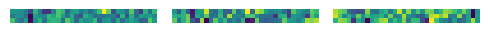

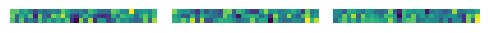

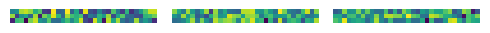

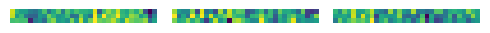

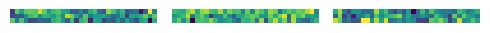

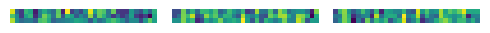

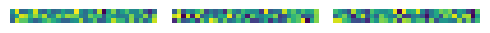

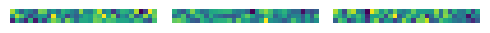

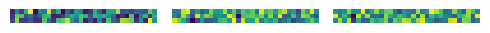

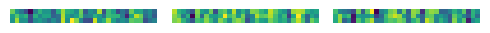

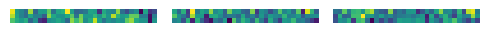

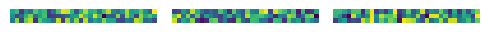

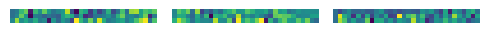

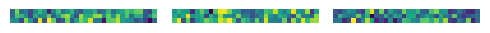

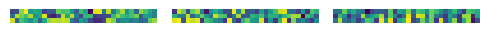

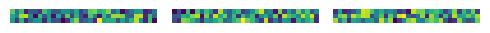

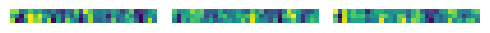

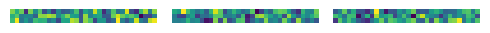

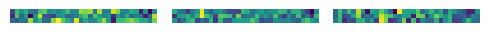

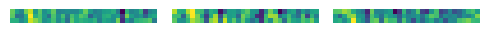

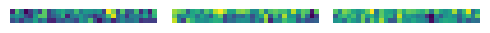

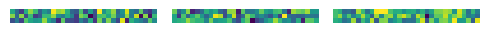

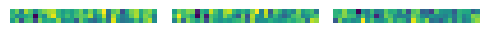

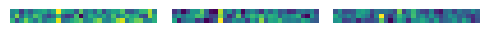

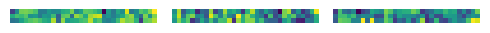

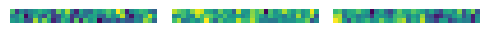

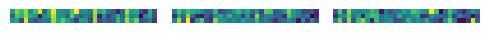

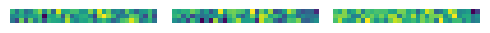

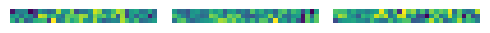

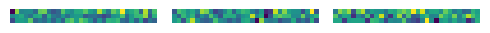

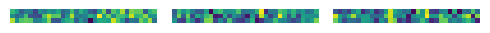

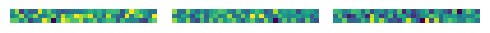

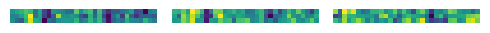

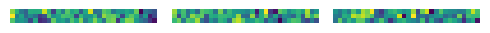

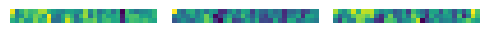

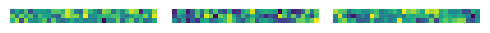

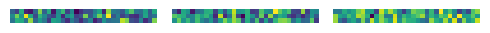

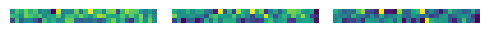

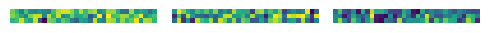

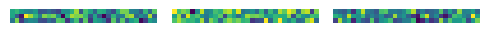

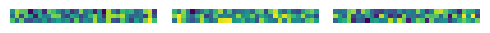

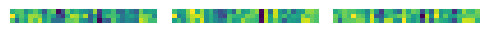

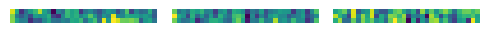

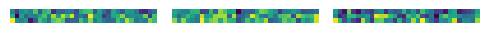

In [32]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

conv2d (3, 3, 3, 16)
16


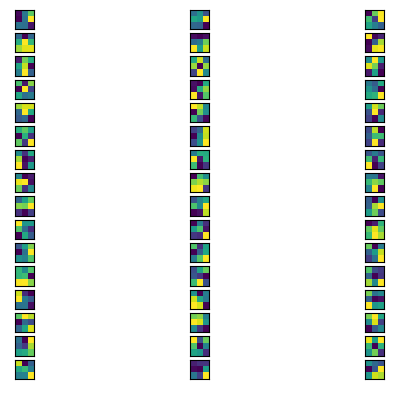

conv2d_1 (3, 3, 16, 32)
32


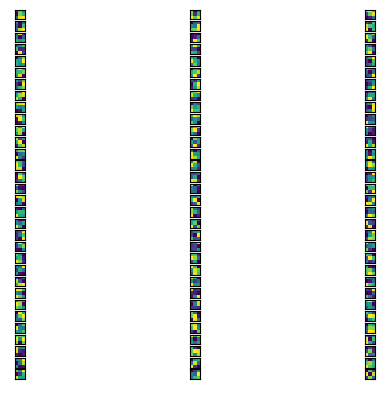

conv2d_2 (3, 3, 32, 64)
64


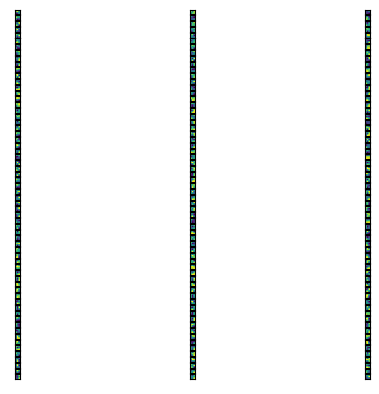

In [33]:
#Visualizing the filters
#plt.figure(figsize=(5,5))
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting ecah channel
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()
        

In [34]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

1/1 [==============================] - 0s 100ms/step
(1, 75, 75, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 64)
(1, 20736)
(1, 512)
(1, 1)


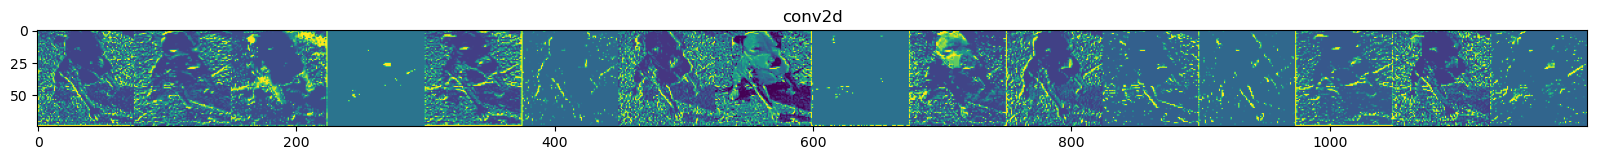

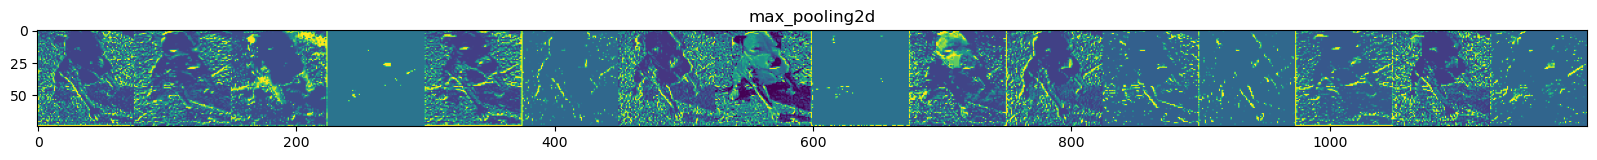

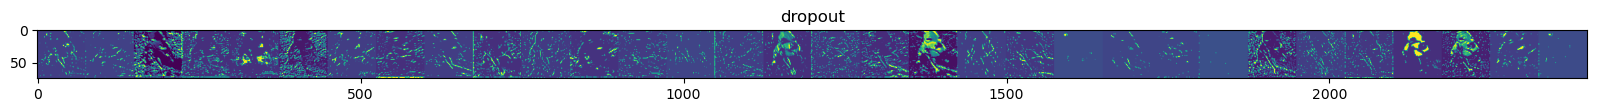

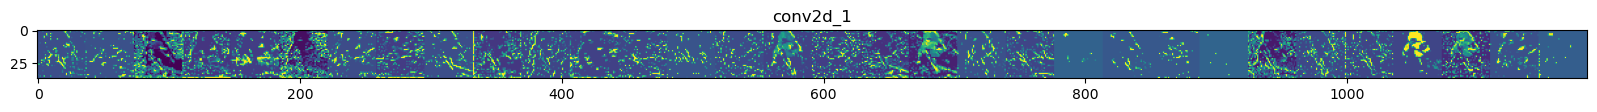

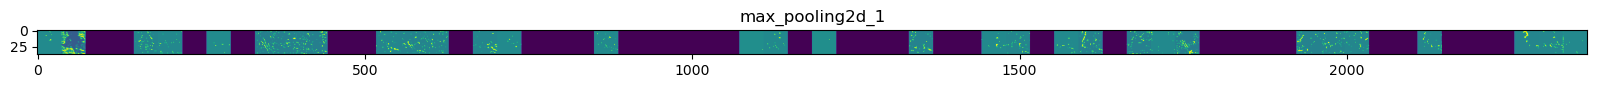

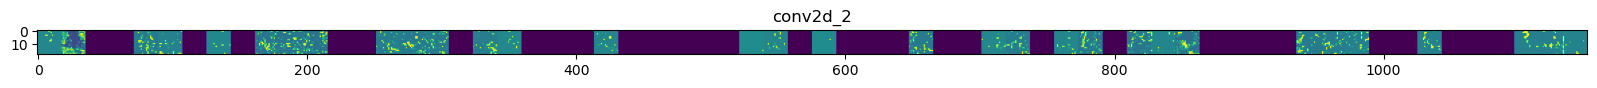

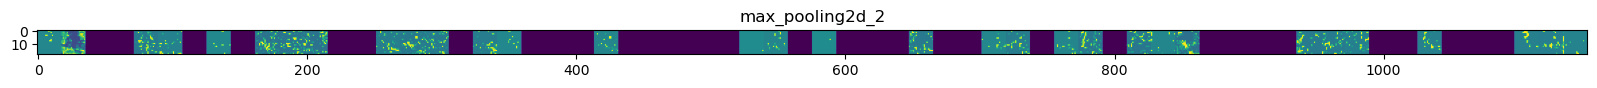

In [51]:
img_path='C:\\Users\\sashe\\OneDrive\\Desktop\\neural networks\\cat_vs_dog\\test_set\\dogs\\dog.4051.jpg' #dog
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
#cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
#dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

#img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

1/1 [==============================] - 0s 101ms/step
(1, 75, 75, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 64)
(1, 20736)
(1, 512)
(1, 1)


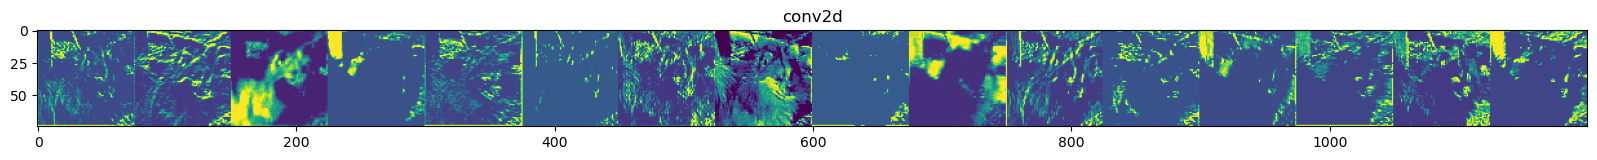

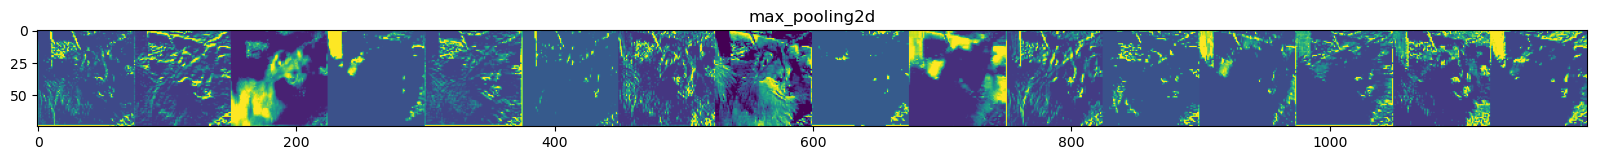

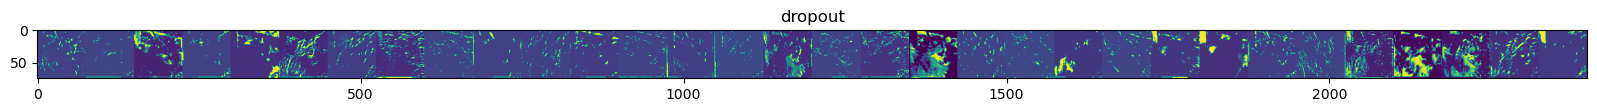

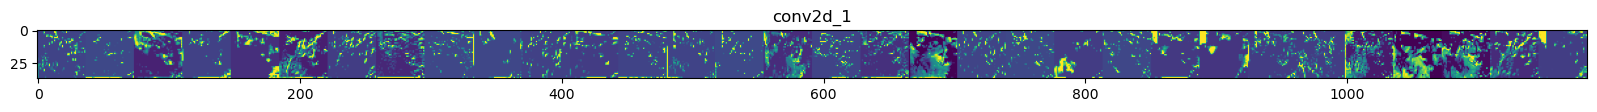

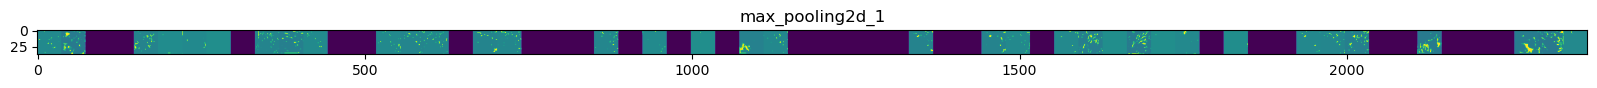

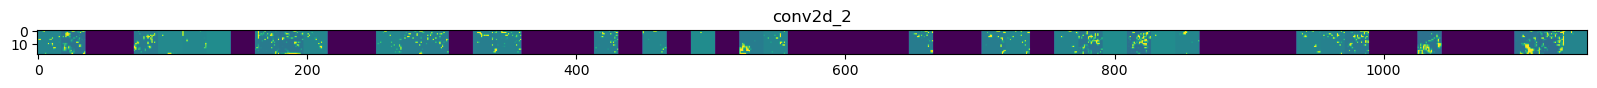

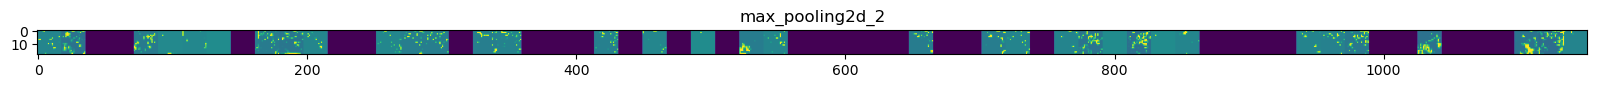

In [52]:
img_path='C:\\Users\\sashe\\OneDrive\\Desktop\\neural networks\\cat_vs_dog\\test_set\\dogs\\dog.4201.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))  
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)                   
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x 

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

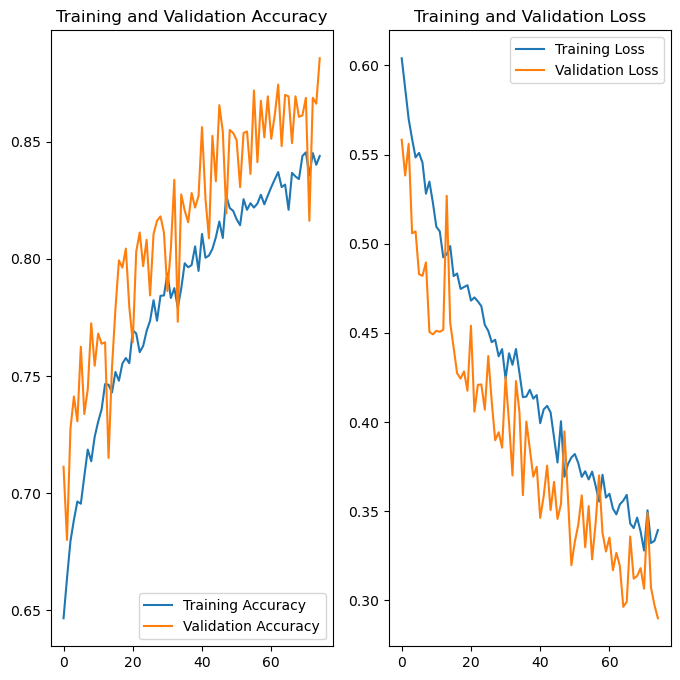

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()